## Task 1

 На основі файлу banking.csv , що міститься в репозиторії лекції, виконайте наступні дії
 1.Сформуйте тестові та тренувальні датасети(розмір тестової  вибірки 0,3)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [35]:
df = pd.read_csv('banking.csv')

df["job"] = df['job'].str.replace('-', '_')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue_collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [30]:
print(df.isnull().sum())
print('Size table is',np.shape(df))

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64
Size table is (41188, 21)


In [40]:
X = df[['emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed']]
y = df['y']

In [41]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)

## Task 2

Застосуйте логістичну регрессію для прогнозування цільової метрики у(ймовіірність того що клієнт відкриє вклад у банку)

In [42]:
print(y_train.sum()/len(y_train))
print(y_test.sum()/len(y_test))

0.11355832263882626
0.11054463057376386


In [43]:
log_regression = LogisticRegression()
log_regression.fit(X_train,y_train)

LogisticRegression()

In [44]:
y_pred = log_regression.predict(X_test)

## Task 3

Оцініть модель за допомогою матриці похибок метрик precision, recall, F1-score. Побудуйте  AUC-ROC криву для моделі.

In [45]:
import seaborn as sns

In [46]:
cnf_matrix = metrics. confusion_matrix (y_test, y_pred)
cnf_matrix

array([[10933,    58],
       [ 1332,    34]], dtype=int64)

<AxesSubplot:>

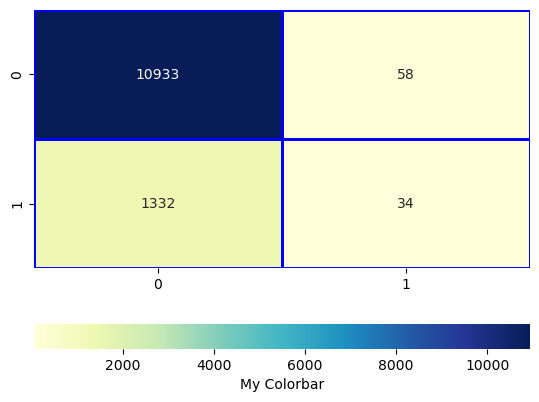

In [56]:
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt= 'g' , ax=ax, cmap="YlGnBu", 
            cbar_kws={'label': 'My Colorbar', 'orientation': 'horizontal'}, linewidths=2, linecolor='blue')

In [57]:
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.3695652173913043


In [58]:
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.024890190336749635


In [59]:
print("F1:",metrics.f1_score(y_test, y_pred, average = None))

F1: [0.94023048 0.04663923]


In [60]:
y_pred_proba = log_regression.predict_proba (X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)

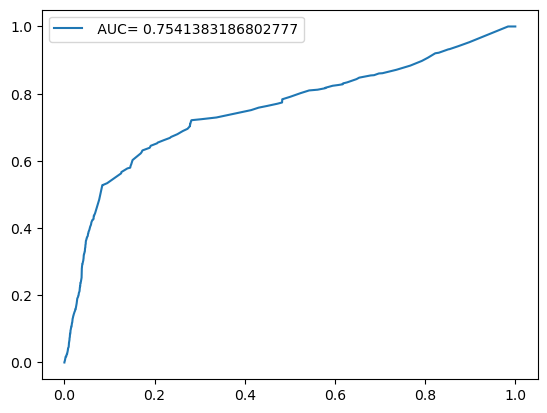

In [66]:
plt.plot (fpr,tpr,label=" AUC= "+str(auc))
plt.legend(loc=2)
plt.show()